In [1]:
#importing useful packages
import matplotlib.pyplot as plt
import numpy as np
import os
#---
from astropy.io import fits
from astropy.io import ascii
import astropy.time
from astropy.time import Time
import astropy.table 
from astropy.table import Table, Column, MaskedColumn
#---
from astroplan import Observer
from astroquery.jplhorizons import Horizons
#---
import pandas as pd
import csv


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [2]:
#need to obtain FITS files
#these FITS files are downloaded locally
path = "C:\\Users\\aayus\\OneDrive - University of Canterbury\\Semester 2 2020\\ASTR381 Research\\Research Project\\MUSE Headers"
os.chdir(path) #from now on, we are in this directory
fits_files=[]
for entry in os.listdir(path):
    fits_files.append(entry)

In [3]:
#extracting data from each file
obsDate_lst = []
airmass_correction = [] #HIERARCH ESO TEL IA FWHM
end_parallactic_angle = [] #HIERARCH ESO TEL PARANG END
start_parallactic_angle = [] #HIERARCH ESO TEL PARANG START
ra_tracking_rate = [] #HIERARCH ESO TEL TRAK RATEA
dec_tracking_rate = [] #HIERARCH ESO TEL TRAK RATED
integration_time = [] #EXPTIME
obs_start_mjd = [] #MJD-OBS
arcfile_name = [] #ARCFILE
end_airmass = [] #HIERARCH ESO TEL AIRM END
start_airmass = [] #HIERARCH ESO TEL AIRM START
start_alt_angle = [] #HIERARCH ESO TEL ALT
for i in fits_files:
    hdr = fits.Header.fromfile(i,sep='\n',endcard=False, padding=False)
    obsDate_lst.append(hdr['DATE-OBS']) 
    airmass_correction.append(hdr['HIERARCH ESO TEL IA FWHM'])
    end_parallactic_angle.append(hdr['HIERARCH ESO TEL PARANG END'])
    start_parallactic_angle.append(hdr['HIERARCH ESO TEL PARANG START'])
    ra_tracking_rate.append(hdr['HIERARCH ESO TEL TRAK RATEA'])
    dec_tracking_rate.append(hdr['HIERARCH ESO TEL TRAK RATED'])
    integration_time.append(hdr['EXPTIME'])
    obs_start_mjd.append(hdr['MJD-OBS'])
    arcfile_name.append(hdr['ARCFILE'])
    end_airmass.append(hdr['HIERARCH ESO TEL AIRM END'])
    start_airmass.append(hdr['HIERARCH ESO TEL AIRM START'])
    start_alt_angle.append(hdr['HIERARCH ESO TEL ALT'])    

In [4]:
#the downloaded FITS files and the extracted archive names are actually slightly different
#so making a dictionary for both is a good idea
#first we want to strip the "*.fits" for easier matching
fits_files_stripped = []
for i in range(0,len(fits_files)):
    fits_files_stripped.append(fits_files[i].strip(".fits"))
fits_files_stripped = sorted(fits_files_stripped)
#now we make the dictionary
arcfile_names_dict = {arcfile_name[i]: fits_files_stripped[i] for i in range(len(arcfile_name))} 

In [5]:
#need to convert epoch date from 'fits' type to julian date
jd_obsDate_lst = []
for i in obsDate_lst:
    t = Time(i, format='fits', scale='utc')
    jd_obsDate_lst.append(t.jd) 

In [6]:
#need to query information from JPL Horizons database
eph_lst = []
for i in jd_obsDate_lst:
    obj = Horizons(id='C/2019 Q4', location='809',epochs=i)
    eph_lst.append(obj.ephemerides())

In [7]:
#need to query full information from JPL Horizons database
observations = Horizons(id='C/2019 Q4', location='809',epochs=jd_obsDate_lst)
jpl_data = observations.ephemerides()

In [8]:
jpl_data[0]

targetname,datetime_str,datetime_jd,M1,solar_presence,k1,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,Tmag,Nmag,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str19,str24,float64,float64,str1,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32,float64,str1,int32,int32,int32,int32,int32,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Borisov (C/2019 Q4),2019-Nov-14 08:03:10.611,2458801.835539479,13.7,,4.5,m,161.68644,-0.59821,161.93426,-0.70003,65.41318,-101.282,74.131838,27.302364,-488.68,757.33,-230155.04,62894.938,276.727,6.8797692056,2.17,0.324,16.87,--,94.84019,--,245682.8,*,--,--,--,--,--,109.34,0.0,--,--,136.8271,-8.3061,2.077572635284,-9.961438,2.22992682034218,-23.3101441,18.54573585,43.5417228,58.9693813,68.2452,/L,26.2569,91.3,96.8398,85.5038,289.291,330.982,-17.51262,Sex,69.182687,163.6078188,-7.7319627,--,--,250.584929,49.172159,3.5983168718,0.000354,0.051,0.054,0.057,0.047,-50.862,0.0170138,0.074,601.2991,7.47e-05,1.31,4.77,0.004011,342.8665,-3.915847858,26.2589,150.0889,-8.2334


In [9]:
#we want to find the list of FITS archive files and strip the .fits 
#to be able to match it to the Night Report archive file names
new_arcfile_name = []
for i in arcfile_name: #arcfile_name is a list that is extracted from the FITS files
    new_arcfile_name.append(i.strip(".fits"))

In [10]:
#now we need to make the JPL data and the FITS data into tables
JPLtableData = jpl_data['datetime_str','datetime_jd','RA','DEC','RA_rate','DEC_rate','Tmag','airmass','r','r_rate','delta','delta_rate','elong','alpha']
JPL_colnames = ['datetime_str','datetime_jd','RA','DEC','RA_rate','DEC_rate','Tmag','airmass','r','r_rate','delta','delta_rate','elong','alpha']
JPL_astropy_tbl = Table(JPLtableData,names=JPL_colnames)
#---------------------------------------
FITStabledata = [new_arcfile_name,obs_start_mjd,obsDate_lst,airmass_correction,start_parallactic_angle,end_parallactic_angle,ra_tracking_rate,dec_tracking_rate,integration_time,start_airmass,end_airmass,start_alt_angle]
FITS_colnames = ['new_arcfile_name','obs_start_mjd','obs_date','airmass_correction','start_parallactic_angle','end_parallactic_angle','ra_tracking_rate','dec_tracking_rate','integration_time','start_airmass','end_airmass','start_alt_angle']
FITS_astropy_tbl = Table(FITStabledata,names=FITS_colnames)

In [11]:
# now we want to join both tables together
# since there is no common key between both tables, we cannot use astropy.table.join()
# instead we use a 'horizontal stack', which simply appends both tables together
JPL_FITS_tbl = astropy.table.hstack((JPL_astropy_tbl,FITS_astropy_tbl))

In [12]:
JPL_FITS_tbl[0]

datetime_str,datetime_jd,RA,DEC,RA_rate,DEC_rate,Tmag,airmass,r,r_rate,delta,delta_rate,elong,alpha,new_arcfile_name,obs_start_mjd,obs_date,airmass_correction,start_parallactic_angle,end_parallactic_angle,ra_tracking_rate,dec_tracking_rate,integration_time,start_airmass,end_airmass,start_alt_angle
---,d,deg,deg,arcsec / h,arcsec / h,mag,---,AU,km / s,AU,km / s,deg,deg,,,,,,,,,,,,
str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str28,float64,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64
2019-Nov-14 08:03:10.611,2458801.835539479,161.68644,-0.59821,65.41318,-101.282,16.87,2.17,2.077572635284,-9.961438,2.22992682034218,-23.3101441,68.2452,26.2569,MUSE.2019-11-14T08:03:10.611,58801.33553948,2019-11-14T08:03:10.611,1.15,-117.935,-118.662,15.018197,14.971863,600.0,2.073,1.925,28.743


In [13]:
#cleaning up the table and rearranging columns in a logical order
new_order = ['new_arcfile_name','datetime_str','obs_date','datetime_jd','obs_start_mjd','RA','DEC','RA_rate','DEC_rate',
             'Tmag','airmass','r','r_rate','delta','delta_rate','elong','alpha','airmass_correction','start_parallactic_angle',
             'end_parallactic_angle','ra_tracking_rate','dec_tracking_rate','integration_time','start_airmass','end_airmass','start_alt_angle']

JPL_FITS_tbl_rearranged = JPL_FITS_tbl[new_order]

In [86]:
#it's time to read in the Night Reports
path = "C:/Users/aayus/OneDrive - University of Canterbury/Semester 2 2020/ASTR381 Research/Research Project/Night Reports/"
os.chdir(path) #from now on, we are in this directory

night_report_staff = pd.read_csv("night_reports_staff.csv")
night_report_data = pd.read_csv("night_reports_photometric_data.csv")

#switch back to our main working directory
path = "C:/Users/aayus/OneDrive - University of Canterbury/Semester 2 2020/ASTR381 Research/Research Project/"
os.chdir(path) #from now on, we are in this directory

In [87]:
#extracting columns of archive file names in the Night Reports
nightReport_archive_names = night_report_data['archiveName']

In [88]:
#we want to find the matching names in the FITS list and the Night Report list of archive filenames
#this works, but its length is 55 - it's chopped off 4 entries for some reason 
#(maybe those 4 filenames are just missing from the Night Report data)
common_arcfile_names = set(nightReport_archive_names) & set(new_arcfile_name)
common_arcfile_names = sorted(list(common_arcfile_names))

In [89]:
#now we want to find the index numbers in the Night Reports list for those entries that match the FITS arcfile names
common_arcfile_indices = []
for i in common_arcfile_names:
    common_arcfile_indices.append(np.where(nightReport_archive_names == i)) #this returns a weird list/tuple/tuple thing - need to strip it further

#stripping the list of matching index numbers and converting it to a sorted list of index numbers
stripped_common_arcfile_indices = []
for i in range(0,len(common_arcfile_indices)):
    stripped_common_arcfile_indices.append(common_arcfile_indices[i][0][0])
stripped_common_arcfile_indices = sorted(stripped_common_arcfile_indices)

In [90]:
#converting the Night Report Pandas dataframe to a list for easier handling
night_report_data_lst = night_report_data.values.tolist()

#finally making a list of all entries in the Night Report data list which match the archive filenames
final_common_night_report_entries = []
for i in stripped_common_arcfile_indices:
    final_common_night_report_entries.append(night_report_data_lst[i])

In [91]:
night_report_data.head()

,filename,reportStartDate,reportEndDate,obsID,startTime,endTime,dataProduct,obFileName,archiveName,Airmass,DIMM,fulfilled,publicComments
0,20191113,13/11/2019,14/11/2019,200434622,23:36:15,0:11:36,CALIB/STD/IFU,MUSE_WFM_STD317_0001.fits,MUSE.2019-11-13T23:43:31.708,1.141,1.27,na,na
1,20191113,13/11/2019,14/11/2019,200434622,23:36:15,0:11:36,CALIB/STD/IFU,MUSE_WFM_STD317_0002.fits,MUSE.2019-11-13T23:50:46.846,1.151,1.08,na,na
2,20191113,13/11/2019,14/11/2019,200434622,23:36:15,0:11:36,CALIB/STD/IFU,MUSE_WFM_STD317_0003.fits,MUSE.2019-11-13T23:58:11.879,1.163,0.94,na,na
3,20191113,13/11/2019,14/11/2019,200434622,23:36:15,0:11:36,CALIB/STD/IFU,MUSE_WFM_STD318_0001.fits,MUSE.2019-11-14T00:05:26.383,1.177,0.77,na,na
4,20191113,13/11/2019,14/11/2019,2637187,7:53:29,8:59:59,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS318_0005.fits,MUSE.2019-11-14T08:03:10.611,2.073,0.8,yes,"Comet not perfectly centered, but we chose not..."


In [92]:
#converting columns from the Pandas dataframe to lists, for easier handling
nightReport_filename_lst = night_report_data['filename'].values.tolist()
nightReport_reportStartDate_lst = night_report_data['reportStartDate'].values.tolist()
nightReport_reportEndDate_lst = night_report_data['reportEndDate'].values.tolist()
nightReport_obsID_lst = night_report_data['obsID'].values.tolist()
nightReport_startTime_lst = night_report_data['startTime'].values.tolist()
nightReport_endTime_lst = night_report_data['endTime'].values.tolist()
nightReport_dataProduct_lst = night_report_data['dataProduct'].values.tolist()
nightReport_obFileName_lst = night_report_data['obFileName'].values.tolist()
nightReport_archiveName_lst = night_report_data['archiveName'].values.tolist()
nightReport_Airmass_lst = night_report_data['Airmass'].values.tolist()
nightReport_DIMM_names_lst = night_report_data['DIMM'].values.tolist()
nightReport_fulfilled_names_lst = night_report_data['fulfilled'].values.tolist()
nightReport_publicComments_lst = night_report_data['publicComments'].values.tolist()

In [93]:
# now we want to make a Night Reports table
NightReport_tabledata = [nightReport_filename_lst,nightReport_reportStartDate_lst,nightReport_reportEndDate_lst,nightReport_obsID_lst,nightReport_startTime_lst,nightReport_endTime_lst,nightReport_dataProduct_lst,nightReport_obFileName_lst,nightReport_archiveName_lst,nightReport_Airmass_lst,nightReport_DIMM_names_lst,nightReport_fulfilled_names_lst,nightReport_publicComments_lst]
NightReport_colnames = ['filename','reportStartDate','reportEndDate','obsID','startTime','endTime','dataProduct','obFileName','new_arcfile_name','Airmass','DIMM','fulfilled','publicComments']
NightReport_astropy_tbl = Table(NightReport_tabledata,names=NightReport_colnames)

In [94]:
# now we want to combine the table of FITS and JPL data with the Night Report data with the key of the archive filenames
final_combined_table = astropy.table.join(JPL_FITS_tbl_rearranged, NightReport_astropy_tbl,keys='new_arcfile_name')

In [95]:
# we want the datetimes to appear nicely in the Latex table output
datetime_str_nice = []
for i in final_combined_table['datetime_str']:
    datetime_str_nice.append(i[0:-4]) #removing the last 4 characters of the datetime

#making a Night Reports table which includes the nice datetime
latex_tbl = Table([datetime_str_nice],names=["datetime_str_nice"])
latex_new_tbl = astropy.table.hstack((latex_tbl,JPL_FITS_tbl))
#joining this with the final table
latex_final_combined_table = astropy.table.join(latex_new_tbl, NightReport_astropy_tbl,keys='new_arcfile_name')
latex_final_combined_table[0]

datetime_str_nice,datetime_str,datetime_jd,RA,DEC,RA_rate,DEC_rate,Tmag,airmass,r,r_rate,delta,delta_rate,elong,alpha,new_arcfile_name,obs_start_mjd,obs_date,airmass_correction,start_parallactic_angle,end_parallactic_angle,ra_tracking_rate,dec_tracking_rate,integration_time,start_airmass,end_airmass,start_alt_angle,filename,reportStartDate,reportEndDate,obsID,startTime,endTime,dataProduct,obFileName,Airmass,DIMM,fulfilled,publicComments
,---,d,deg,deg,arcsec / h,arcsec / h,mag,---,AU,km / s,AU,km / s,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,
str20,str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str28,float64,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,str10,str10,int32,str8,str7,str18,str30,str5,str4,str3,str150
2019-Nov-14 08:03:10,2019-Nov-14 08:03:10.611,2458801.835539479,161.68644,-0.59821,65.41318,-101.282,16.87,2.17,2.077572635284,-9.961438,2.22992682034218,-23.3101441,68.2452,26.2569,MUSE.2019-11-14T08:03:10.611,58801.33553948,2019-11-14T08:03:10.611,1.15,-117.935,-118.662,15.018197,14.971863,600.0,2.073,1.925,28.743,20191113,13/11/2019,14/11/2019,2637187,7:53:29,8:59:59,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS318_0005.fits,2.073,0.8,yes,"Comet not perfectly centered, but we chose not to abort the OB since otherwise a large fraction of the observations would have been taken in twilight."


In [96]:
#WRITING TABLES!!!
#as an ASCII .dat file
ascii.write(final_combined_table,"final_table.dat",overwrite=True)
#as a CSV
ascii.write(final_combined_table,"final_table.csv",format="csv",overwrite=True)
#as an HTML file
final_combined_table.write('final_table.html',format='jsviewer')
#as Latex code
ascii.write(latex_final_combined_table['datetime_str_nice','start_alt_angle','airmass','r','delta','elong','alpha'],format="latex",
           formats={'start_alt_angle':'%12.1f',
                    'airmass':'%12.2f',
                    'r':'%12.2f',
                    'delta':'%12.2f',
                    'elong':'%12.2f',
                    'alpha':'%12.2f'})

\begin{table}
\begin{tabular}{ccccccc}
datetime_str_nice & start_alt_angle & airmass & r & delta & elong & alpha \\
 &  & --- & $\mathrm{AU}$ & $\mathrm{AU}$ & $\mathrm{{}^{\circ}}$ & $\mathrm{{}^{\circ}}$ \\
2019-Nov-14 08:03:10 & 28.7 & 2.17 & 2.08 & 2.23 & 68.25 & 26.26 \\
2019-Nov-14 08:19:45 & 32.4 & 1.95 & 2.08 & 2.23 & 68.25 & 26.26 \\
2019-Nov-15 08:02:02 & 29.3 & 2.13 & 2.07 & 2.22 & 68.60 & 26.40 \\
2019-Nov-15 08:18:33 & 32.9 & 1.92 & 2.07 & 2.22 & 68.61 & 26.40 \\
2019-Nov-15 08:53:20 & 40.5 & 1.60 & 2.07 & 2.22 & 68.61 & 26.40 \\
2019-Nov-26 07:17:24 & 28.0 & 2.16 & 2.02 & 2.09 & 72.41 & 27.69 \\
2019-Nov-26 07:34:33 & 31.9 & 1.93 & 2.02 & 2.09 & 72.42 & 27.69 \\
2019-Nov-26 07:46:28 & 34.6 & 1.79 & 2.02 & 2.09 & 72.42 & 27.69 \\
2019-Nov-26 08:03:33 & 38.5 & 1.64 & 2.02 & 2.09 & 72.43 & 27.70 \\
2019-Dec-05 07:09:26 & 33.2 & 1.82 & 2.01 & 2.02 & 75.40 & 28.36 \\
2019-Dec-05 07:26:38 & 37.2 & 1.66 & 2.01 & 2.02 & 75.40 & 28.36 \\
2019-Dec-05 07:38:31 & 39.9 & 1.57 & 2.01 &

In [97]:
#this is perihelion (8th Dec 2019)
eph_lst[16]['elong','alpha'] 

elong,alpha
deg,deg
float64,float64
75.7366,28.4166


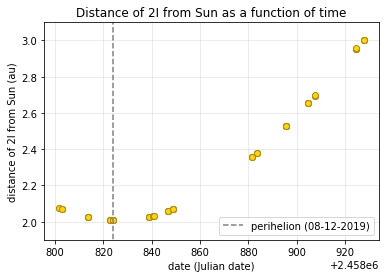

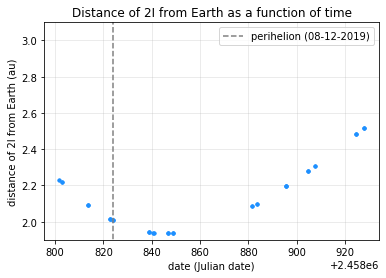

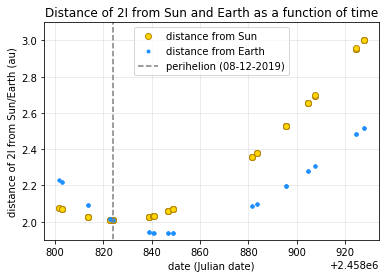

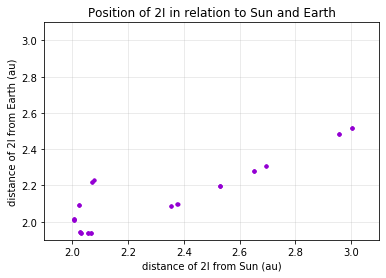

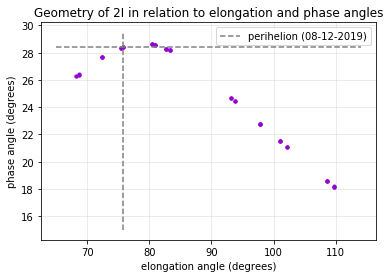

In [98]:
#we want to produce some plots now
r = []
d = []
t = []
e = []
a = []
m = []
for eph in eph_lst:
    r.append(eph['r'])
    d.append(eph['delta'])
    t.append(eph['datetime_jd'])
    e.append(eph['elong'])
    a.append(eph['alpha'])
    m.append(eph['Tmag'])

#making 'zero lines' for perihelion
zeroLine_y1=np.arange(0,3.2,0.1)
zeroLine_x1=np.full(len(zeroLine_y1),2458823.850764514)
    
# r vs t (where r is distance from sun in AU and t is time in Julian date)
plt.figure()
plt.plot(t,r,"o",color="gold",markeredgecolor="darkgoldenrod")
plt.plot(zeroLine_x1,zeroLine_y1,"--",color="gray",label="perihelion (08-12-2019)")
plt.xlabel("date (Julian date)")
plt.ylabel("distance of 2I from Sun (au)")
plt.ylim(1.9,3.1)
plt.title("Distance of 2I from Sun as a function of time")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("2I_vs_sun.png",dpi=900)
plt.show()

# d vs t (where d is distance from Earth in AU and t is time in Julian date)
plt.figure()
plt.plot(t,d,".",color="dodgerblue")
plt.plot(zeroLine_x1,zeroLine_y1,"--",color="gray",label="perihelion (08-12-2019)")
plt.xlabel("date (Julian date)")
plt.ylabel("distance of 2I from Earth (au)")
plt.ylim(1.9,3.1)
plt.title("Distance of 2I from Earth as a function of time")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("2I_vs_earth.png",dpi=900)
plt.show()

#combo plot of (d vs t) and (r vs t) 
#(where d is distance from Earth in AU, r is distance from sun in AU, and t is time in Julian date)
plt.figure()
plt.plot(t,r,"o",color="gold",markeredgecolor="darkgoldenrod",label="distance from Sun")
plt.plot(t,d,".",color="dodgerblue",label="distance from Earth")
plt.plot(zeroLine_x1,zeroLine_y1,"--",color="gray",label="perihelion (08-12-2019)")
plt.xlabel("date (Julian date)")
plt.ylabel("distance of 2I from Sun/Earth (au)")
plt.ylim(1.9,3.1)
plt.title("Distance of 2I from Sun and Earth as a function of time")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("2I_vs_sun_earth_combo.png",dpi=900)
plt.show()

# r vs d (where r is distance from sun in AU and d is distance from Earth in AU)
plt.figure()
plt.plot(r,d,".",color="darkviolet")
plt.xlabel("distance of 2I from Sun (au)")
plt.ylabel("distance of 2I from Earth (au)")
plt.title("Position of 2I in relation to Sun and Earth")
plt.xlim(1.9,3.1)
plt.ylim(1.9,3.1)
plt.grid(alpha=0.3)
plt.savefig("2I_vs_sun_and_earth.png",dpi=900)
plt.show()

#making 'zero lines' for perihelion
zeroLine_y2=np.arange(15,30,0.5)
zeroLine_x2=np.full(len(zeroLine_y2),75.7366) #alpha
zeroLine_y3=np.arange(65,115,1)
zeroLine_x3=np.full(len(zeroLine_y3),28.4166) #elong

# elong vs alpha (where elong is elongation angle in deg and alpha is phase angle in deg)
plt.figure()
plt.plot(e,a,".",color="darkviolet")
plt.plot(zeroLine_x2,zeroLine_y2,"--",color="gray",label="perihelion (08-12-2019)")
plt.plot(zeroLine_y3,zeroLine_x3,"--",color="gray")
plt.xlabel("elongation angle (degrees)")
plt.ylabel("phase angle (degrees)")
plt.title("Geometry of 2I in relation to elongation and phase angles")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("2I_elong_alpha.png",dpi=900)
plt.show()

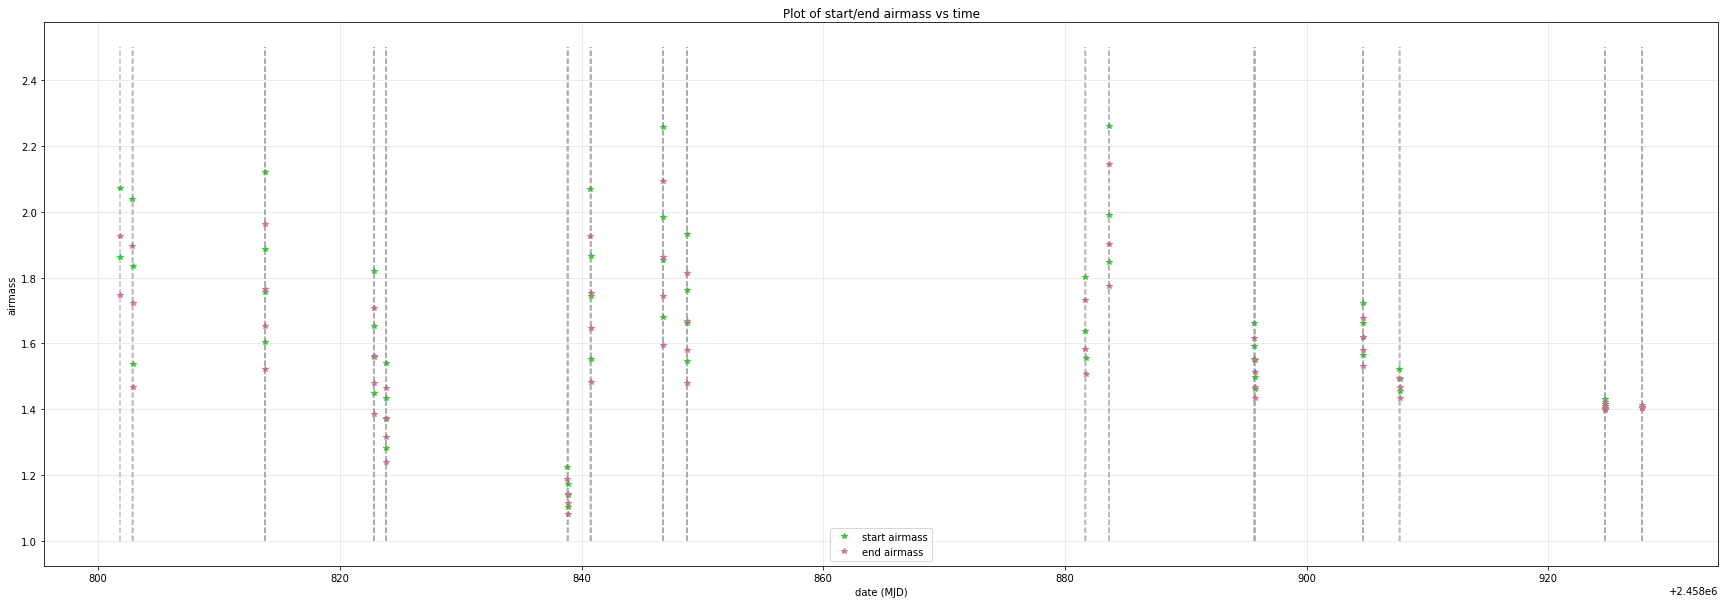

In [27]:
# plot of start and end airmass vs time
# plot takes some time to render
plt.figure(figsize=(30,10))
plt.plot(t,start_airmass,"*",color="limegreen",label="start airmass")
plt.plot(t,end_airmass,"*",color="palevioletred",label="end airmass")
zeroLine_y4=np.arange(1,3,0.5)
for i in t: #making a line for each epoch of observation
    zeroLine_x4=np.full(len(zeroLine_y4),i) 
    plt.plot(zeroLine_x4,zeroLine_y4,"--",color="gray",alpha=0.3)
plt.title("Plot of start/end airmass vs time")
plt.xlabel("date (MJD)")
plt.ylabel("airmass")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("start_end_airmass.png",dpi=900)
plt.show()

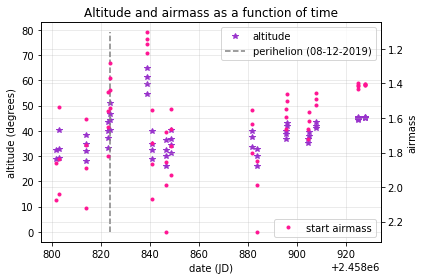

In [99]:
# making a plot for altitude/airmass vs time
# zero line for perihelion
zeroLine_y5=np.arange(0,80)
zeroLine_x5=np.full(len(zeroLine_y5),2458823.850764514)

fig,ax1 = plt.subplots()

plt.grid(alpha=0.3)
ax1.set_xlabel("date (JD)")
ax1.set_ylabel("altitude (degrees)" )
ax1.plot(t,start_alt_angle,"*",color="darkorchid",label="altitude")
ax1.plot(zeroLine_x5,zeroLine_y5,"--",color="gray",label="perihelion (08-12-2019)")
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('airmass')  # we already handled the x-label with ax1
ax2.plot(t,start_airmass,'.',color="deeppink",label="start airmass")
ax2.invert_yaxis()
ax2.tick_params(axis='y')
plt.grid(alpha=0.3)

plt.title("Altitude and airmass as a function of time")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(loc="lower right")
plt.savefig("altitude_airmass.png",dpi=900)
plt.show()

In [100]:
# now we want to see how close to sunrise the observations were made
#getting alt/az info for the Sun at time/location of observation
utc_observe_time = Time(final_combined_table['obs_date'],format='isot', scale='utc')
paranal = Observer.at_site("Paranal Observatory", timezone="UTC")
sun_altaz_data = paranal.sun_altaz(utc_observe_time) 
altitudes = sun_altaz_data.alt.value #getting only the altitude value of the sun
altitudes

array([-21.96319998, -18.78062788, -22.05068578, -18.89521257,
       -11.99855043, -28.74446308, -25.88066937, -23.80967912,
       -20.73897632, -29.46021733, -26.74394225, -24.77795045,
       -21.94013483, -24.92561748, -22.11796621, -20.00868404,
       -16.49437889, -22.27826016, -19.28727085, -17.14288289,
       -13.99971155, -39.00809853, -37.52503319, -36.29726979,
       -33.4997586 , -41.3724335 , -40.31750802, -39.46391611,
       -37.81494268, -40.58951382, -39.37720572, -38.34595521,
       -36.70214911, -47.41474577, -48.34910662, -48.35489109,
       -42.61165818, -45.68608105, -47.23999859, -51.00361216,
       -52.05343258, -52.53845758, -52.84059633, -52.79010386,
       -50.03993197, -51.89934861, -53.12517446, -54.49250644,
       -56.17250646, -56.76133819, -57.17345941, -63.72764447,
       -63.73810942, -63.37134386, -62.21421322])

In [101]:
# now we want to sort through the list and assign them to one of 4 categories:
# nighttime observations, astronomical twilight observations, nautical twilight observations, civil twilight observations
civil_alts = [] #0,-6
nautical_alts = [] #-6,-12
astronomical_alts = [] #-12,-18
night_alts = [] 
for i in altitudes:
    if (i > -6 and i <= 0):
        civil_alts.append(i)
    elif (i > -12 and i <= -6):
        nautical_alts.append(i)
    elif (i > -19 and i <= -12):
        astronomical_alts.append(i)
    else:
        night_alts.append(i)
print(civil_alts)
print(nautical_alts)
print(astronomical_alts)
print(night_alts)

[]
[-11.998550425716973]
[-18.78062788198719, -18.89521257149104, -16.49437889099195, -17.142882886505294, -13.999711553542816]
[-21.96319997900034, -22.050685779984907, -28.744463084490807, -25.880669369914074, -23.809679120699734, -20.7389763219966, -29.46021732663731, -26.743942245048004, -24.777950448285235, -21.940134826231574, -24.925617480781042, -22.117966207335357, -20.008684042345195, -22.27826015688996, -19.287270846591067, -39.00809852583892, -37.52503319085978, -36.2972697871395, -33.49975859512367, -41.37243350423989, -40.317508022536856, -39.463916110144496, -37.81494267744895, -40.589513823047, -39.377205721183685, -38.345955211324494, -36.70214911460562, -47.41474577371734, -48.349106617351566, -48.35489109134031, -42.611658184020875, -45.686081052117416, -47.2399985931303, -51.00361215931446, -52.05343258382944, -52.53845758352624, -52.84059632684755, -52.790103857281416, -50.03993197064567, -51.89934860988286, -53.125174455867686, -54.49250644309847, -56.172506464221

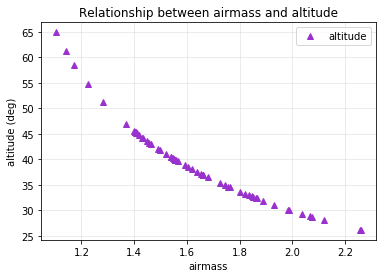

In [102]:
# plot to demonstrate relationship between altitude and airmass
plt.figure()
plt.plot(start_airmass,start_alt_angle,"^",color="darkorchid",label="altitude")
plt.xlabel("airmass")
plt.ylabel("altitude (deg)")
plt.title("Relationship between airmass and altitude")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("airmass_altitude_relationship.png",dpi=900)
plt.show()

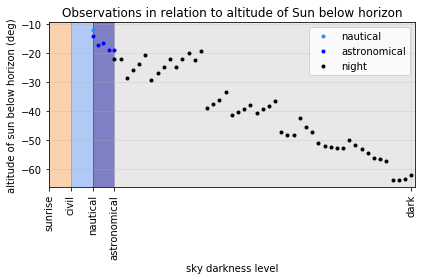

In [103]:
#civil = np.arange(-6,0,len(civil_alts)) #since there are no civil twilight observations, we cannot display them
nautical = np.linspace(-12,-6,len(nautical_alts))
astronomical = np.linspace(-18,-12,len(astronomical_alts))
night = np.linspace(-100,-18,len(night_alts))


# plot showing observations in relation to altitude of sun
fig, ax = plt.subplots()
ax.plot(nautical,nautical_alts,".",color="dodgerblue",label="nautical")
ax.plot(astronomical,astronomical_alts,".",color="blue",label="astronomical")
ax.plot(night[::-1],night_alts,".",color="black",label="night")
ax.axvspan(0, -6, alpha=0.5, color='sandybrown')
ax.axvspan(-6, -12, alpha=0.5, color='cornflowerblue')
ax.axvspan(-12, -18, alpha=0.5, color='darkblue')
ax.axvspan(-18, -101, alpha=0.5, color='lightgrey')
plt.legend()
plt.title("Observations in relation to altitude of Sun below horizon")
plt.xlabel("sky darkness level")
plt.ylabel("altitude of sun below horizon (deg)")
plt.xlim(-101,0)
plt.grid(alpha=0.3)
plt.xticks([-100,-18,-12,-6,0],('dark', 'astronomical', 'nautical', 'civil', 'sunrise'),rotation=90)
ax.invert_xaxis()
plt.tight_layout()
plt.savefig("altitude_twilights.png",dpi=900)
plt.show()

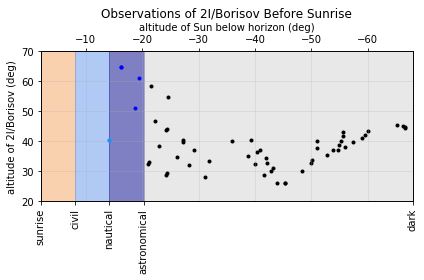

In [138]:
alt_dict = {start_alt_angle[i]: altitudes[i] for i in range(len(altitudes))} 
comet_alt, sun_alt = zip(*sorted(alt_dict.items()))

fig, ax = plt.subplots()
for i in range(0,55):
    if (sun_alt[i] > -6 and sun_alt[i] <= 0):
        ax.plot(sun_alt[i],comet_alt[i],".")
    elif (sun_alt[i] > -12 and sun_alt[i] <= -6):
        ax.plot(sun_alt[i],comet_alt[i],".",color="dodgerblue")
    elif (sun_alt[i] > -18 and sun_alt[i] <= -12):
        ax.plot(sun_alt[i],comet_alt[i],".",color="blue")
    else:
        ax.plot(sun_alt[i],comet_alt[i],".",color="black")
               
ax.plot(sun_alt[37],comet_alt[37],".",color="dodgerblue",label="nautical")
ax.plot(sun_alt[-1],comet_alt[-1],".",color="blue",label="astronomical")
ax.plot(sun_alt[0],comet_alt[0],".",color="black",label="night")
ax.axvspan(0, -6, alpha=0.5, color='sandybrown')
ax.axvspan(-6, -12, alpha=0.5, color='cornflowerblue')
ax.axvspan(-12, -18, alpha=0.5, color='darkblue')
ax.axvspan(-18, -101, alpha=0.5, color='lightgrey')
plt.xlim(-65,0)
plt.ylim(20,70)
plt.grid(alpha=0.3)
ax2.set_xlabel('sky darkness') 
plt.ylabel('altitude of 2I/Borisov (deg)') 
plt.xticks([-65,-18,-12,-6,0],('dark', 'astronomical', 'nautical', 'civil', 'sunrise'),rotation=90)

ax2 = ax.twiny()
ax2.set_xlabel('altitude of Sun below horizon (deg)')  
ax2.plot(np.arange(-65,0,5),np.arange(-65,0,5),".",alpha=0)

ax.invert_xaxis()
ax2.invert_xaxis()
plt.grid(alpha=0.3)
plt.title("Observations of 2I/Borisov Before Sunrise")
plt.tight_layout()
plt.savefig("altitude_twilights.png",dpi=900)

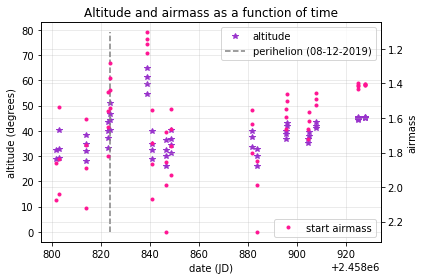

In [105]:
# making a plot for altitude/airmass vs time
fig,ax1 = plt.subplots()

plt.grid(alpha=0.3)
ax1.set_xlabel("date (JD)")
ax1.set_ylabel("altitude (degrees)" )
ax1.plot(t,start_alt_angle,"*",color="darkorchid",label="altitude")
ax1.plot(zeroLine_x5,zeroLine_y5,"--",color="gray",label="perihelion (08-12-2019)")
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('airmass')  # we already handled the x-label with ax1
ax2.plot(t,start_airmass,'.',color="deeppink",label="start airmass")
ax2.invert_yaxis()
ax2.tick_params(axis='y')
plt.grid(alpha=0.3)

plt.title("Altitude and airmass as a function of time")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(loc="lower right")
plt.savefig("altitude_airmass.png",dpi=900)
plt.show()

In [106]:
final_combined_table

new_arcfile_name,datetime_str,obs_date,datetime_jd,obs_start_mjd,RA,DEC,RA_rate,DEC_rate,Tmag,airmass,r,r_rate,delta,delta_rate,elong,alpha,airmass_correction,start_parallactic_angle,end_parallactic_angle,ra_tracking_rate,dec_tracking_rate,integration_time,start_airmass,end_airmass,start_alt_angle,filename,reportStartDate,reportEndDate,obsID,startTime,endTime,dataProduct,obFileName,Airmass,DIMM,fulfilled,publicComments
,---,,d,,deg,deg,arcsec / h,arcsec / h,mag,---,AU,km / s,AU,km / s,deg,deg,,,,,,,,,,,,,,,,,,,,,
str28,str24,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,str10,str10,int32,str8,str7,str18,str30,str5,str4,str3,str150
MUSE.2019-11-14T08:03:10.611,2019-Nov-14 08:03:10.611,2019-11-14T08:03:10.611,2458801.835539479,58801.33553948,161.68644,-0.59821,65.41318,-101.282,16.87,2.17,2.077572635284,-9.961438,2.22992682034218,-23.3101441,68.2452,26.2569,1.15,-117.935,-118.662,15.018197,14.971863,600.0,2.073,1.925,28.743,20191113,13/11/2019,14/11/2019,2637187,7:53:29,8:59:59,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS318_0005.fits,2.073,0.8,yes,"Comet not perfectly centered, but we chose not to abort the OB since otherwise a large fraction of the observations would have been taken in twilight."
MUSE.2019-11-14T08:19:45.880,2019-Nov-14 08:19:45.880,2019-11-14T08:19:45.880,2458801.847058796,58801.3470588,161.69147,-0.60599,65.35715,-101.292,16.87,1.948,2.077506371652,-9.9570514,2.2297718118359,-23.2886538,68.2495,26.2585,1.05,-119.051,-119.927,15.018197,14.971863,600.0,1.862,1.747,32.394,20191113,13/11/2019,14/11/2019,2637187,7:53:29,8:59:59,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS318_0007.fits,1.862,0.8,yes,"Comet not perfectly centered, but we chose not to abort the OB since otherwise a large fraction of the observations would have been taken in twilight."
MUSE.2019-11-15T08:02:02.188,2019-Nov-15 08:02:02.188,2019-11-15T08:02:02.188,2458802.834747546,58802.33474755,162.1254,-1.27555,65.28986,-102.165,16.852,2.128,2.071933671914,-9.5792264,2.21680892922479,-22.8438652,68.6019,26.3975,1.26,-117.669,-118.373,15.01814,14.971622,600.0,2.038,1.895,29.29,20191114,14/11/2019,15/11/2019,2637190,7:51:05,9:04:56,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS319_0005.fits,2.038,0.87,yes,target well centred - DIMM 0.7
MUSE.2019-11-15T08:18:33.659,2019-Nov-15 08:18:33.659,2019-11-15T08:18:33.659,2458802.846222905,58802.34622291,162.1304,-1.28336,65.23375,-102.174,16.852,1.916,2.071870194655,-9.574817,2.21665760305415,-22.8222843,68.6061,26.399,32.58,-118.744,-119.597,15.01814,14.971622,600.0,1.835,1.724,32.936,20191114,14/11/2019,15/11/2019,2653772,7:51:05,9:04:56,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS319_0007.fits,1.835,0.68,yes,target well centred - DIMM 0.8
MUSE.2019-11-15T08:53:20.124,2019-Nov-15 08:53:20.123,2019-11-15T08:53:20.123,2458802.870371794,58802.3703718,162.14091,-1.29981,65.12497,-102.193,16.852,1.605,2.071736707805,-9.5655364,2.21633964963231,-22.7713685,68.6149,26.4023,1.09,-121.8,-123.059,15.01814,14.971622,600.0,1.539,1.469,40.467,20191114,14/11/2019,15/11/2019,2686936,7:51:05,9:04:56,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS319_0010.fits,1.539,0.57,yes,target well centred - DIMM 0.10
MUSE.2019-11-26T07:17:24.151,2019-Nov-26 07:17:24.150,2019-11-26T07:17:24.150,2458813.803751736,58813.30375175,166.89371,-9.06294,63.21361,-110.568,16.681,2.159,2.024988131853,-5.1850233,2.09125924384652,-17.3938002,72.4141,27.6927,0.99,-113.092,-113.253,15.017564,14.969285,600.0,2.121,1.961,28.025,20191125,25/11/2019,26/11/2019,2637193,7:08:07,8:15:10,SCIENCE/OBJECT/IFU,MUSE_WFM-NOAO_OBS330_0001.fits,2.121,0.43,yes,"The comet was slightly off-centered, so it was manually placed at the center of the FoV."
MUSE.2019-11-26T07:34:33.387,2019-Nov-26 07:34:33.386,2019-11-26T07:34:33.386,2458813.81566419,58813.3156642,166.8988,-9.07172,63.14694,-110.57,16.681,1.925,2.024952473716,-5.1800859,2.0911396484117,-17.3731678,72.4183

In [107]:
#this is perihelion (8th Dec 2019)
eph_lst[16]['Tmag','alpha'] 

Tmag,alpha
mag,deg
float64,float64
16.576,28.4166


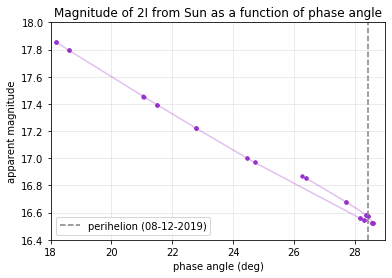

In [108]:
#making 'zero lines' for perihelion
zeroLine_y7=np.arange(16.4,18,0.1)
zeroLine_x7=np.full(len(zeroLine_y7),28.4166)
    
# r vs t (where r is distance from sun in AU and t is time in Julian date)
plt.figure()
plt.plot(a,m,".",color="darkorchid")
plt.plot(a,m,color="darkorchid",alpha=0.3)
plt.plot(zeroLine_x7,zeroLine_y7,"--",color="gray",label="perihelion (08-12-2019)")
plt.xlabel("phase angle (deg)")
plt.ylabel("apparent magnitude")
plt.xlim(18,29)
plt.ylim(16.4,18)
plt.title("Magnitude of 2I from Sun as a function of phase angle")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("2I_mag.png",dpi=900)
plt.show()